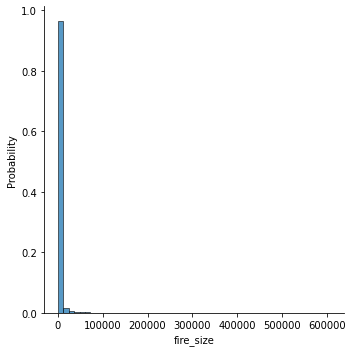

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

df = pd.read_csv('../data/FW_Veg_Rem_Combined.csv')

sns.displot(data=df, x='fire_size',  bins=50, stat='probability')
plt.show()

In [5]:
#calculation of number of nans and non-nans

nans = df.loc[df.fire_size.isna()]
print(f'Number of NANs is: {nans.size}')

non_nans = df.loc[~df.fire_size.isna()]
print(f'number of values is: {non_nans.size}')

Number of NANs is: 0
number of values is: 2380781


335873


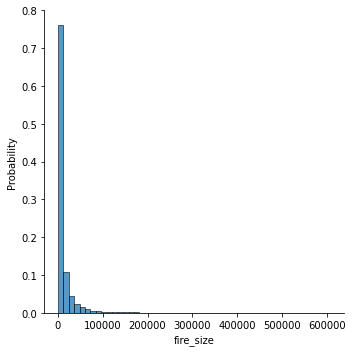

In [7]:
#sampling PPS

fire_size_total = df['fire_size'].sum()
sample_size = int(non_nans.size * 0.1)

df['cumulative_sum_fs'] = df['fire_size'].cumsum()
interval_width = int(fire_size_total/sample_size)

num = interval_width #can be a random number also as in the example

sampled_series = np.arange(num, fire_size_total, interval_width)
cum_array = np.asarray(df['cumulative_sum_fs'])
selected_samples = np.zeros(sample_size, dtype='int32')
idx = np.searchsorted(cum_array,sampled_series) #the heart of code
result = cum_array[idx-1] 
ndf = df[df.cumulative_sum_fs.isin(result)]
del ndf['cumulative_sum_fs'] #so that new file doesn't have cum_sum column
print(ndf.size)


sns.displot(data=ndf, x='fire_size',  bins=50, stat='probability')
plt.show()